***Vector and matrices in Python***

In [2]:
from numpy import array
#Set two arrays of two rows
ket0 = array([1, 0])
ket1 = array([0, 1])
#divide it with 2
display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [3]:
#set a 2x2 matrix
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [4]:
from numpy import matmul
#use the operation matrices multiplication
# 2x2 per 2x1 
# rows of the first matrix multiplicated by columns of the second matrix
display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

***States, measurements and operations***

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt
#Set these state for a particular 0 or 1 state
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [7]:
#verify the format as it will be write
display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

[0.33333333+0.j,0.66666667+0.j]

In [8]:
#Verify if the states applies as quatum state
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [9]:
x = Statevector([(1 + 2.0j) / 3, -2 / 3])
x.draw("latex")

<IPython.core.display.Latex object>

In [42]:
x.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 572, '1': 428}

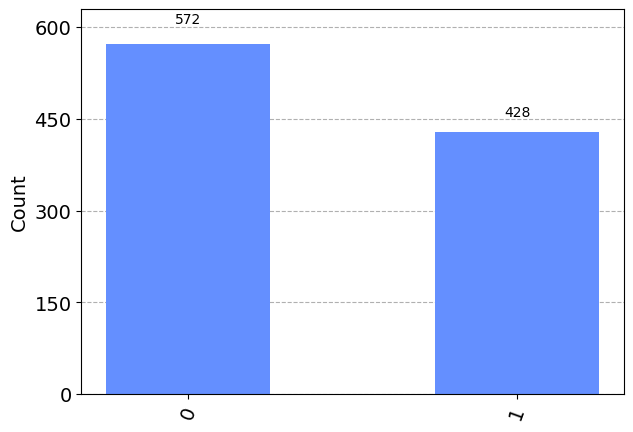

In [68]:
from qiskit.visualization import plot_histogram

statistics = x.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

***Operators***

In [71]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

a = Statevector([1, 0])

a = a.evolve(H)
a = a.evolve(T)
a = a.evolve(H)
a = a.evolve(T)
a = a.evolve(Z)

#a.draw("text")
a.draw()
#a.draw("latex")

'Statevector([ 0.85355339+0.35355339j, -0.35355339+0.14644661j],\n            dims=(2,))'

In [82]:
#Evaluate the a state vector
a.measure()

('1',
 Statevector([ 0.        +0.j        , -0.92387953+0.38268343j],
             dims=(2,)))

{'0': 845, '1': 155}

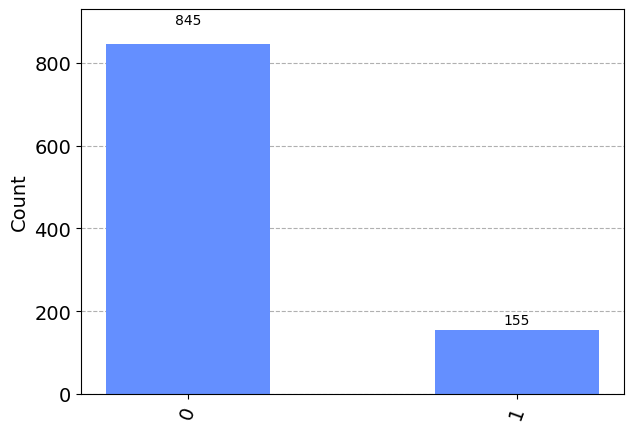

In [86]:


statistics = a.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [84]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [85]:
ket2 = Statevector([1,0])
a = ket2.evolve(circuit)
a.draw("latex")

<IPython.core.display.Latex object>

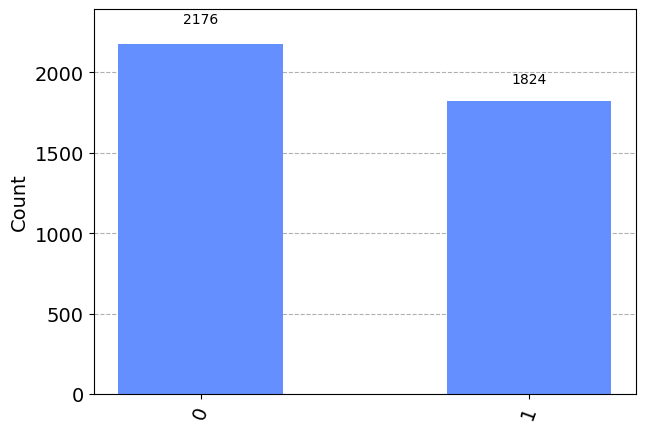

In [102]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)